In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lin3ar.regression import LinearRegression

df = pd.read_csv("./crabs.csv")

# Hypotheses!

## 1: Longer crab => older crab ?

In [9]:
from scipy.stats import pearsonr
r, p = pearsonr(df['Dlugosc'], df['Wiek'])
print(f"Pearson r = {r:.3f}, p = {p:.3f}")

Pearson r = 0.555, p = 0.000


In [10]:
# Linear Regression & R2 Score Check
Xtemp = df[['Dlugosc']]
ytemp = df['Wiek']

Xtemp = (Xtemp - Xtemp.mean()) / Xtemp.std()
ytemp = (ytemp - ytemp.mean()) / ytemp.std()

model = LinearRegression(solver='ls')
model.fit(Xtemp, ytemp)

r2 = model.r2_score(ytemp, model.predict(Xtemp))
print(f'R2 Score: {r2:.3f}')

R2 Score: 0.308


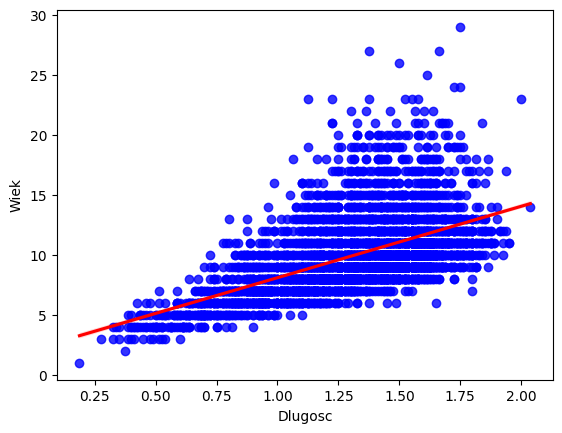

In [11]:
sns.regplot(x='Dlugosc', y='Wiek', data=df, color='red', scatter_kws={'color': 'blue'})
plt.show()

Conclusion: Although the coefficient of determination (R² ≈ 0.3) and the scatterplot suggest only a moderate fit of the linear regression model, the Pearson correlation test (r = 0.555, p < 0.001) confirms a statistically significant positive relationship between crab length and age.

Therefore, the hypothesis of a positive correlation between length and age is supported, even though more features are likely required for more accurate age prediction.

## 2: Male crabs are older than female

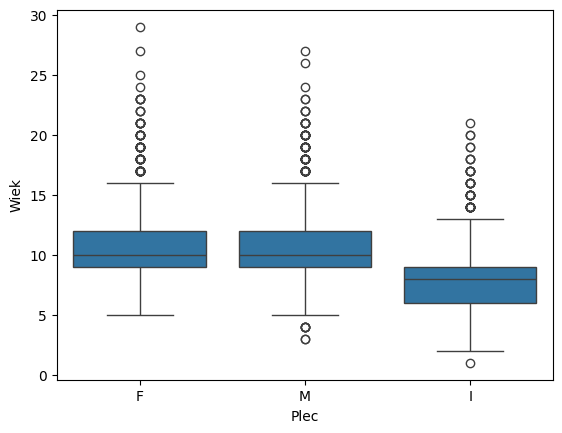

In [12]:
sns.boxplot(data=df, x='Plec', y='Wiek')
plt.show()

In [13]:
# ANOVA Test
# todo - dopracuj
from scipy.stats import f_oneway

group_F = df[df['Plec'] == 'F']['Wiek']
group_M = df[df['Plec'] == 'M']['Wiek']
group_I = df[df['Plec'] == 'I']['Wiek']

f_stat, p_val = f_oneway(group_F, group_M, group_I)
print(f"F-statistic: {f_stat:.3f}, p-value: {p_val:.5f}")

F-statistic: 470.023, p-value: 0.00000


Female crabs are usually older than male crabs, just like humans :D

## 3: